# README

This notebook illustrates how to segment a floor plan image from CVC-FP dataset using [fcn.berkeleyvision.org Github repository](https://github.com/shelhamer/fcn.berkeleyvision.org).
Sroll to the botton to see the results.

## Data
* Download CVC-FP image files and unzip
* Images are in ```CVC-FP/ImagesGT/``` folder

## Caffe
* I download and install [Anaconda Python 3.6 version](https://www.anaconda.com/download/)
* Create a virtualenv, namely ```10707.proj```
```bash
conda create -n 10707.proj 
```
* Install ```caffe``` and optionally ```caffe-gpu```

```bash
conda install caffe

conda install caffe-gpu # optional
```

## Caffe models
* Download caffe models as specified in [fcn.berkeleyvision.org Github repository](https://github.com/shelhamer/fcn.berkeleyvision.org)
* The model files are big, e.g. voc-fcn8s/fcn8s-heavy-pascal.caffemodel is 500 MB.

## Jupyter notebook
* Install jupyter notebook in conda/virtualenv
```bash
conda install nb_conda
```

# Troubleshooting
I use RHEL7.3 and run into a few issues when setting up caffe in Anaconda.

## conda/caffe failed to load libgflags.so.2
> ImportError: libgflags.so.2: cannot open shared object file: No such file or directory

### Solution:
Create a symlink libgflags.so.2 to libgflags.so.2.2
```bash
[dwang@lean lib]$ pwd
/data/apps/anaconda3/envs/10707.proj/lib
[dwang@lean lib]$ ln -s libgflags.so.2.2 libgflags.so.2
```

### Reference
https://github.com/conda-forge/caffe-feedstock/issues/29

## conda/caffe failed to load libprotobuf.so.12

### Solution:
Downgrade to protobuf-3.2
```bash
conda install protobuf=3.2
```

## conda/caffe failed to load libopencv_highgui.so.3.1
### Solution:
Downgrade to opencv-3.1
```bash
conda install opencv=3.1
```


In [52]:
import numpy as np
from PIL import Image
import caffe

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
def segment(file_path, proto='voc-fcn8s/deploy.prototxt', caffe_model='voc-fcn8s/fcn8s-heavy-pascal.caffemodel'):
    # load image, switch to BGR, subtract mean, and make dims C x H x W for Caffe
    im = Image.open(file_path)
    # Convert black and white to RGB
    if im.mode == 'L':
        im = im.convert('RGB')
    in_ = np.array(im, dtype=np.float32)
    in_ = in_[:,:,::-1]
    in_ -= np.array((104.00698793,116.66876762,122.67891434))
    in_ = in_.transpose((2,0,1))

    # load net
    net = caffe.Net(proto, caffe_model, caffe.TEST)
    # shape for input (data blob is N x C x H x W), set data
    net.blobs['data'].reshape(1, *in_.shape)
    net.blobs['data'].data[...] = in_
    # run net and take argmax for prediction
    net.forward()
    out = net.blobs['score'].data[0].argmax(axis=0)
    return out

# Segment an pascal/VOC2010 image

## show the image

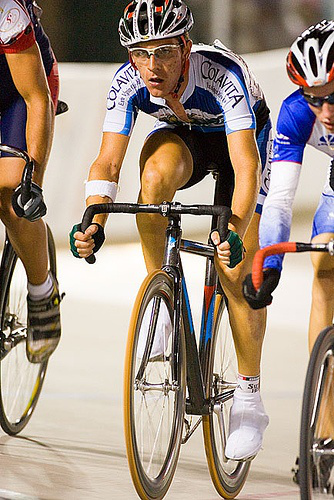

In [49]:
file_path = 'imgs/2007_000129.jpg'
im = Image.open(file_path)
im

## Segment the image

In [51]:
%%time
out = segment(file_path)

CPU times: user 8.86 s, sys: 1.01 s, total: 9.87 s
Wall time: 3.06 s


## visualize the result

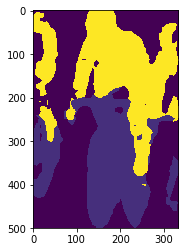

In [8]:
plt.imshow(out)

# CVC-FP

## Show the original image

Convert the image to RGB to make Caffe happy.

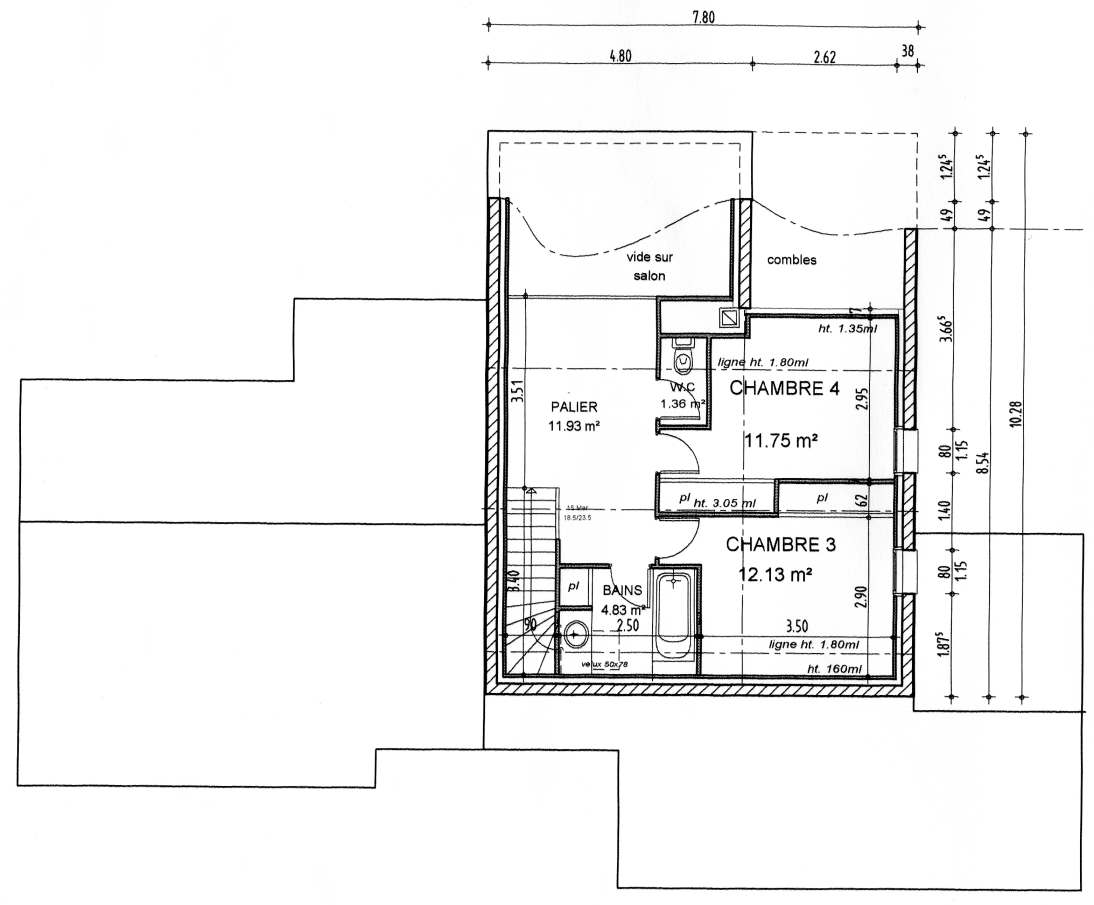

In [39]:
file_path = 'CVC-FP/ImagesGT/1.png'
im = Image.open(file_path)
# Convert black and white to RGB
if im.mode == 'L':
    im = im.convert('RGB')
im

## segement the image 

In [41]:
%%time
out = segment(file_path)

CPU times: user 22.5 s, sys: 2.57 s, total: 25 s
Wall time: 8.87 s


## visualize the result

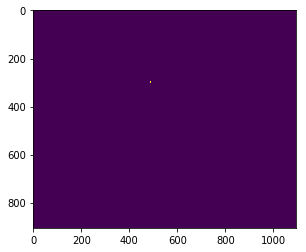

In [47]:
plt.imshow(out)

The ```voc-fcn8s``` trained net isn't able to segment the image.